In [1]:
#https://www.kaggle.com/code/prasadmeesala/breast-cancer-classification-1-0
import numpy as np
import os

# # Import PySwarms
# import pyswarms as ps
# PySwarm Upgrade: scikit-opt
import sko
from sko.APSO import APSO

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE
# import minisom

In [2]:
#/Users/4lali/Downloads/GSE58606_data.csv
data=pd.read_csv("Breast_GSE45827.csv")

In [3]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [4]:
data=data.dropna(axis=0, how='any')
data.shape

(151, 54677)

In [5]:
# check missing values :
data.isnull().values.any()

False

In [6]:
data.iloc[:, :10].describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006


In [7]:
data.groupby("type").count()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
type,,,,,,,,,,,,,,,,,,,,,
HER,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
basal,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
cell_line,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
luminal_A,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
luminal_B,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
normal,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64 




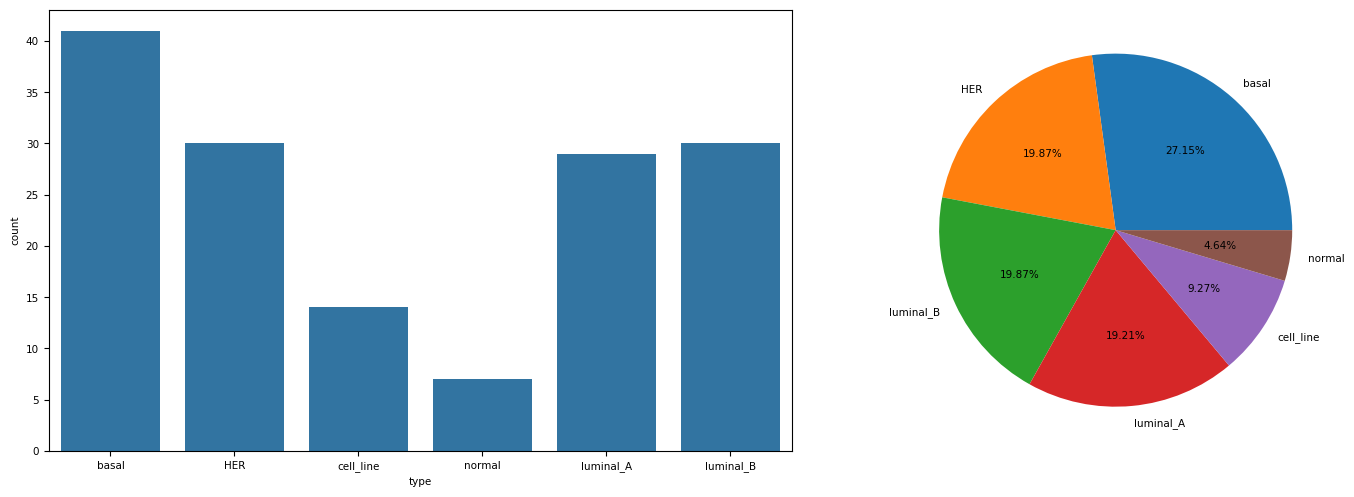

In [8]:
target  = "type"

val_counts = data[target].value_counts()
print(val_counts, "\n\n")

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x = data[target])

plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")

plt.tight_layout()
plt.show()

In [9]:
#Encoding categorical feature(s) (Ordinal Encoding)

class_map = {"normal": 0, "cell_line": 1, "luminal_A": 2, "luminal_B": 3, "HER": 4, "basal": 5}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])

data['type'] = encoder.fit_transform(data[target])

In [10]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,5,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,5,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,5,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,5,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,5,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [11]:
# Separate features (gene expression values) and target variable (sample type)
X = data.drop(['samples', 'type'], axis=1)
y = data['type']


In [12]:
print(X.shape, y.shape)

(151, 54675) (151,)


In [13]:
# Normalize gene expression data using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [14]:
# Perform t-test for feature selection
t_scores, p_values = ttest_ind(X_normalized, y, axis=1)

# Select top-m genes with the largest T-statistic
m = 1000  # Number of top genes to select
selected_genes_indices = (-t_scores).argsort()[:m]
selected_features = X.columns[selected_genes_indices]

# Filter dataset to include only selected features
X_selected = X[selected_features]

In [15]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

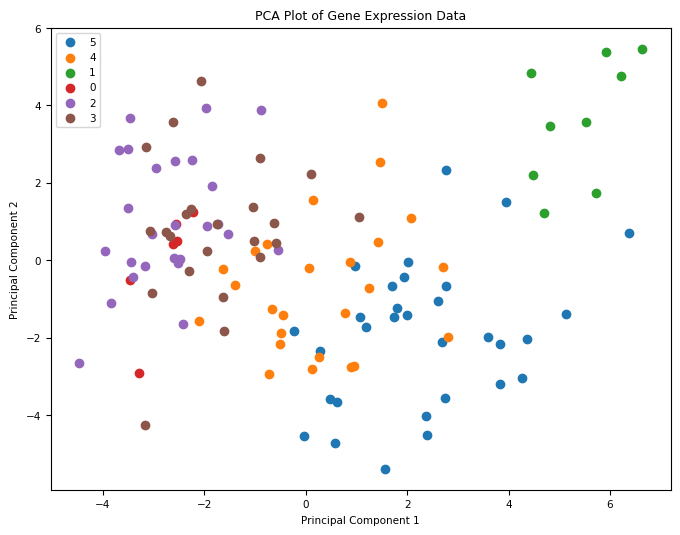

In [16]:
# Visualization (example: PCA plot)
# Note: Visualization depends on the dimensionality reduction technique used
# For simplicity, let's assume PCA here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_pca[y_train == target, 0], X_pca[y_train == target, 1], label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Gene Expression Data')
plt.legend()
plt.savefig("pca_breast.png")
plt.show()

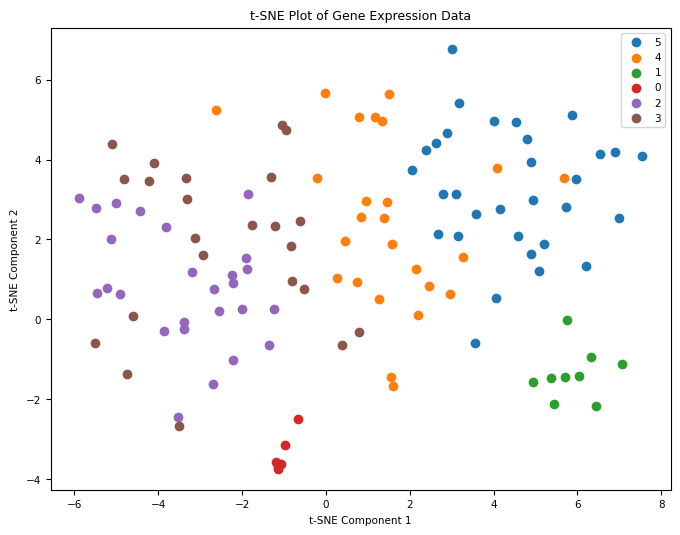

In [17]:
# Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_tsne[y_train == target, 0], X_tsne[y_train == target, 1], label=target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot of Gene Expression Data')
plt.legend()
plt.savefig("tsne_breast.png")
plt.show()

In [18]:
# # Visualization using Self-Organizing Feature Maps (SOFM)
# som = minisom.MiniSom(10, 10, X_normalized.shape[1], sigma=1.0, learning_rate=0.5)
# som.train_batch(X_normalized, 1000, verbose=True)

# plt.figure(figsize=(8, 6))
# for target in data['type'].unique():
#     plt.scatter(X_normalized[y == target, 0], X_normalized[y == target, 1], label=target)
# plt.xlabel('SOFM Component 1')
# plt.ylabel('SOFM Component 2')
# plt.title('SOFM Plot of Gene Expression Data')
# plt.legend()
# plt.savefig("sofm.png")
# plt.show()

In [50]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8064516129032258
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       0.50      1.00      0.67         3
           3       1.00      0.57      0.73         7
           4       0.62      1.00      0.77         5
           5       1.00      0.70      0.82        10

    accuracy                           0.81        31
   macro avg       0.85      0.88      0.83        31
weighted avg       0.89      0.81      0.81        31



In [21]:
# Train Support Vector Machines
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9032258064516129
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         7
           4       0.62      1.00      0.77         5
           5       1.00      0.70      0.82        10

    accuracy                           0.90        31
   macro avg       0.94      0.95      0.93        31
weighted avg       0.94      0.90      0.91        31



In [22]:
# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9032258064516129
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         7
           4       0.62      1.00      0.77         5
           5       1.00      0.70      0.82        10

    accuracy                           0.90        31
   macro avg       0.94      0.95      0.93        31
weighted avg       0.94      0.90      0.91        31



In [23]:
# # Define fitness function
# def fitness_function(selected_features):
#     # Convert selected_features to 1D array
#     selected_features = np.ravel(selected_features)
    
#     # Train classifier using selected features
#     X_selected = X.iloc[:, selected_features]
#     X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
#     knn = KNeighborsClassifier(n_neighbors=5)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     return -accuracy  # Minimize 1-accuracy (i.e., maximize accuracy)

In [14]:
# Define fitness function
def fitness_function(particle):
    # Extract selected features == 1
    particle = np.clip(particle, 0, 1)
    selected_features_indices = np.nonzero(particle == 1)[0]
    
    # Train classifier using selected features
    if selected_features_indices.size == 0:
        return 0
    X_selected = X.iloc[:, selected_features_indices]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    # rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # rf.fit(X_train, y_train)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Minimize 1-accuracy (i.e., maximize accuracy)

# PySwarms

In [25]:
# # Define PSO parameters
# num_particles = 10
# num_features = X.shape[1]
# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# # Initialize PSO optimizer
# optimizer = ps.single.GlobalBestPSO(n_particles=num_particles, dimensions=num_features, options=options)

# # Perform PSO optimization
# best_position, _ = optimizer.optimize(fitness_function, iters=100)

# # Extract selected features
# selected_features_indices = np.where(best_position == 1)[0]
# selected_features = X.columns[selected_features_indices]

# print("Selected Features:", selected_features)

# Scikit-opt

## PSO

Swarming...


Iter: 50 | Best fit: [-0.93548387] at [0.58828363 0.78489275 0.42919496 ... 1.         0.03125546 1.        ]: 100%|██████████| 50/50 [04:23<00:00,  5.26s/it]

best_x is  [0.58828363 0.78489275 0.42919496 ... 1.         0.03125546 1.        ] best_y is [-0.93548387]


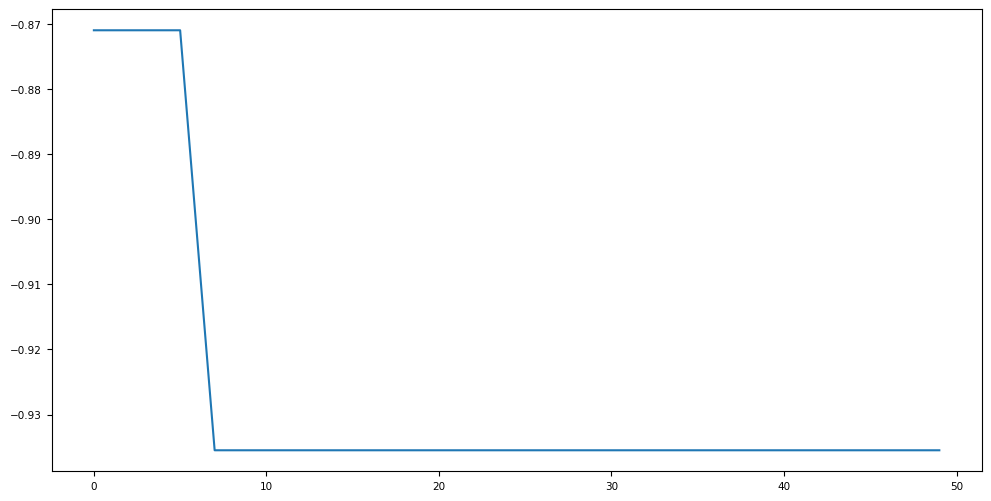

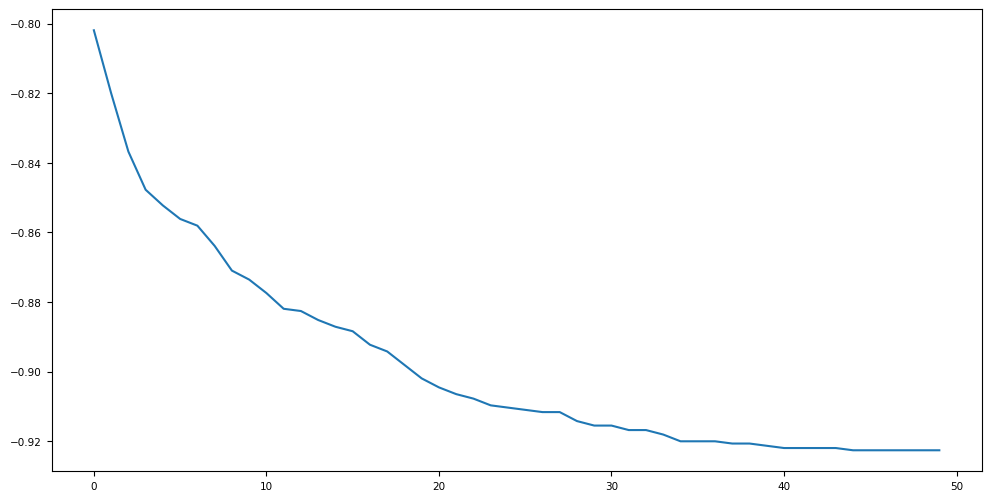

In [14]:
# Do PSO
from sko.PSO import PSO

# parameters: n_dim, pop, max_iter, w, c1, c2
n_dim = X.shape[1]
pop = 50
max_iter = 50
lb = [0] * n_dim
ub = [1] * n_dim
w = 0.65
c1 = 1.7
c2 = 1.7

# initialize PSO
pso = PSO(func=fitness_function, n_dim=n_dim, pop=pop, max_iter=max_iter, lb=lb, ub=ub, w=w, c1=c1, c2=c2, n_processes=os.cpu_count())

# run the PSO
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# Plot the result
plt.plot(pso.gbest_y_hist)
plt.show()
plt.plot(pso.p_best_y_hist)
plt.show()

In [15]:
# Extract selected features == 1
selected_features_indices = np.nonzero(pso.gbest_x == 1)[0]
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

Selected Features: Index(['1255_g_at', '1552263_at', '1552286_at', '1552296_at', '1552306_at',
       '1552307_a_at', '1552315_at', '1552337_s_at', '1552343_s_at',
       '1552354_at',
       ...
       '89476_r_at', '89948_at', 'AFFX-BioB-3_at', 'AFFX-BioDn-5_at',
       'AFFX-DapX-5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-r2-Bs-dap-M_at',
       'AFFX-r2-Bs-phe-3_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-M_at'],
      dtype='object', length=7273)
Number of Selected Features: 7273 out of 54675 features ( 13.3 %)


In [16]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.9354838709677419


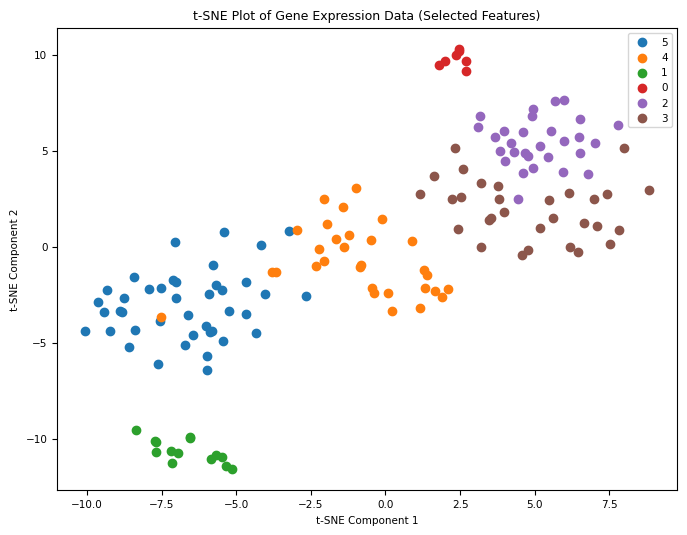

In [17]:
# T-sne plot with selected features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot of Gene Expression Data (Selected Features)')
plt.legend()
plt.savefig("tsne_selected_pso_breast.png")
plt.show()

## BPSO

In [115]:
X_bpso = np.array(X)

In [117]:
from sklearn import linear_model

# Create an instance of the classifier
classifier = linear_model.LogisticRegression()

# Define objective function
def f_per_particle(m, alpha):
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        return 0
    else:
        X_subset = X_bpso[:,m==1]
    print(len(X_subset))
    # Perform classification and store performance in P
    classifier.fit(X_subset, y)
    accuracy = (classifier.predict(X_subset) == y).mean()

    return -accuracy

In [118]:
def f(x, alpha=0.88):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    fit = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(fit)

In [120]:
# Import modules
import numpy as np
import seaborn as sns
import pandas as pd

# Import PySwarms
import pyswarms as ps


# Initialize swarm, arbitrary
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 3, 'p':2}

# Call instance of PSO
dimensions = X_bpso.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)

# Perform optimization
fitness, pos = optimizer.optimize(f, iters=30, n_processes=os.cpu_count(), verbose=2)

2024-07-03 14:12:11,723 - pyswarms.discrete.binary - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 3, 'p': 2}
pyswarms.discrete.binary:   0%|          |0/30


KeyboardInterrupt: 

In [33]:
from sko.BPSO import BinaryPSO # Binary PSO
import matplotlib.pyplot as plt

# Parameters: n_dim, pop, max_iter, w, c1, c2
n_dim = X.shape[1]
pop = 30
max_iter = 10
w = 0.9
c1 = 0.5
c2 = 0.5

# Initialize PSO
bpso = BinaryPSO(fitness_func=fitness_function, dim=n_dim, n_particles=pop, n_iterations=max_iter, inertia_weight=w, cognitive=c1, social=c2, n_processes=os.cpu_count())

# Run the PSO
best_x, best_y = bpso.optimize()
print('best_x is ', best_x, 'best_y is', best_y)

# Plot the result
plt.plot(bpso.gbest_y_hist)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.title('Global Best Fitness Over Iterations')
plt.show()

plt.plot(bpso.p_best_y_hist)
plt.xlabel('Iteration')
plt.ylabel('Average Personal Best Fitness')
plt.title('Average Personal Best Fitness Over Iterations')
plt.show()

Swarming...


  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:11<01:45, 11.69s/it]

Iteration 1/10, Best Fitness: -0.8064516129032258, Best position: [1 0 0 ... 0 1 0], Average Fitness: -0.8021505376344081


 20%|██        | 2/10 [00:22<01:29, 11.15s/it]

Iteration 2/10, Best Fitness: -0.8387096774193549, Best position: [0 0 1 ... 0 1 0], Average Fitness: -0.8075268817204296


 30%|███       | 3/10 [00:32<01:15, 10.83s/it]

Iteration 3/10, Best Fitness: -0.8387096774193549, Best position: [0 0 1 ... 0 1 0], Average Fitness: -0.8075268817204296


 40%|████      | 4/10 [00:44<01:06, 11.10s/it]

Iteration 4/10, Best Fitness: -0.8387096774193549, Best position: [0 0 1 ... 0 1 0], Average Fitness: -0.8075268817204296


 50%|█████     | 5/10 [00:55<00:55, 11.15s/it]

Iteration 5/10, Best Fitness: -0.8387096774193549, Best position: [0 0 1 ... 0 1 0], Average Fitness: -0.8086021505376341


 60%|██████    | 6/10 [01:06<00:43, 10.94s/it]

Iteration 6/10, Best Fitness: -0.8387096774193549, Best position: [0 0 1 ... 0 1 0], Average Fitness: -0.8086021505376341


 60%|██████    | 6/10 [01:16<00:51, 12.83s/it]


KeyboardInterrupt: 

In [17]:
# Extract selected features == 1
selected_features_indices = np.nonzero(bpso.gbest_position == 1)[0]
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

Selected Features: Index(['117_at', '1316_at', '1405_i_at', '1438_at', '1487_at', '1552256_a_at',
       '1552258_at', '1552261_at', '1552263_at', '1552264_a_at',
       ...
       'AFFX-r2-Bs-phe-5_at', 'AFFX-r2-Bs-thr-3_s_at', 'AFFX-r2-Bs-thr-M_s_at',
       'AFFX-r2-Ec-bioC-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-5_at',
       'AFFX-ThrX-5_at', 'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at'],
      dtype='object', length=25556)
Number of Selected Features: 25556 out of 54675 features ( 46.74 %)


In [26]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.8387096774193549


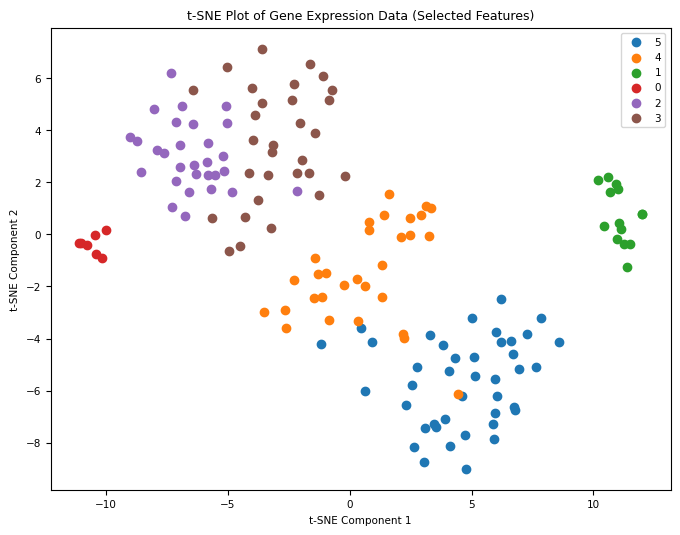

In [19]:
# T-sne plot with selected features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot of Gene Expression Data (Selected Features)')
plt.legend()
plt.savefig("tsne_selected_bpso_breast.png")
plt.show()

## AFSA

  0%|          | 0/30 [00:00<?, ?it/s]

Fish are swarming...


Epoch: 30 | Best fit: [-0.93548387] at [0.129211   0.98450284 0.15132629 ... 0.18961172 0.38506838 0.76947525] | Average fit: -0.9032258064516128: 100%|██████████| 30/30 [05:43<00:00, 11.73s/it]

[0.129211   0.98450284 0.15132629 ... 0.18961172 0.38506838 0.76947525] [-0.93548387]


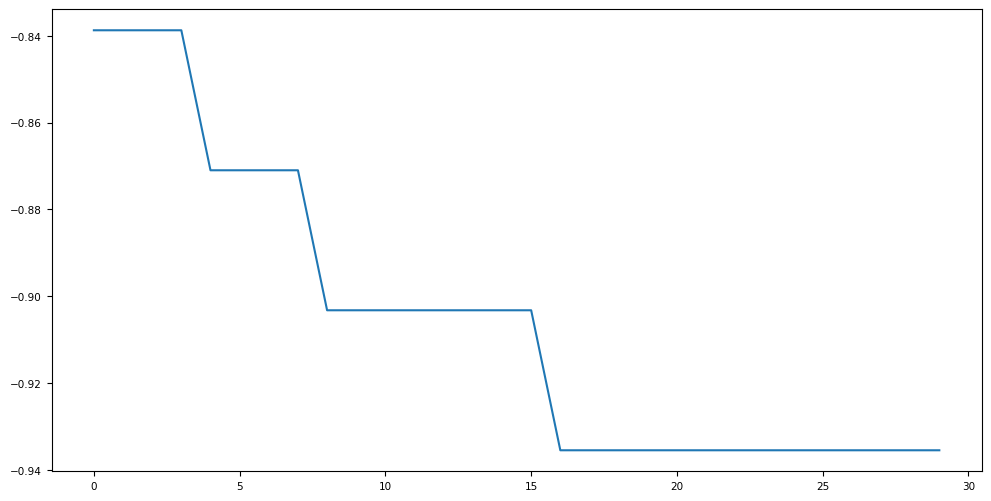

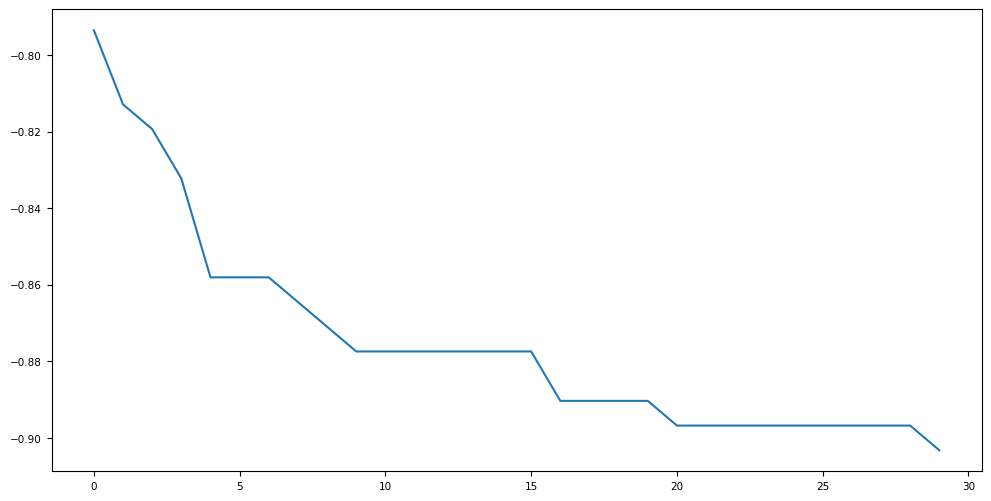

In [14]:
from sko.AFSA import AFSA

# hyperparameters: n_dim, size_pop, max_iter, max_try_num, step, visual, q, delta
n_dim = X.shape[1]
size_pop = 5
max_iter = 30
lb = [0] * n_dim
ub = [1] * n_dim
max_try_num = 30
step = 0.5
visual = 0.3
q = 0.98                                                                                                                                                    
delta = 0.7

# init and run AFSA
afsa = AFSA(func=fitness_function, n_dim=n_dim, size_pop=size_pop, max_iter=max_iter, lb=lb, ub=ub, max_try_num=max_try_num, step=step, visual=visual, q=q, delta=delta, n_processes = os.cpu_count())
best_x, best_y = afsa.run()
print(best_x, best_y)

# Plot the result
plt.plot(afsa.best_y_hist)
plt.show()
plt.plot(afsa.best_y_avg_hist)
plt.show()

In [15]:
# Extract selected features == 1
selected_features_indices = np.nonzero(best_x == 1)[0]
selected_features = X.columns[selected_features_indices]

print("Selected Features:", selected_features)
print("Number of Selected Features:", len(selected_features), "out of", X.shape[1], "features (", np.round(len(selected_features) / X.shape[1] * 100, 2), "%)")

Selected Features: Index(['1552266_at', '1552422_at', '1552458_at', '1552641_s_at',
       '1552657_a_at', '1552788_a_at', '1552937_s_at', '1553108_at',
       '1553150_at', '1553248_at',
       ...
       '31845_at', '33307_at', '35156_at', '35201_at', '39763_at', '43544_at',
       '52837_at', '90610_at', '91826_at', 'AFFX-LysX-5_at'],
      dtype='object', length=1104)
Number of Selected Features: 1104 out of 54675 features ( 2.02 %)


In [16]:
# Train K-Nearest Neighbors classifier using selected features
X_selected = X.iloc[:, selected_features_indices]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy
print("Accuracy of KNN classifier using selected features:", accuracy)

Accuracy of KNN classifier using selected features: 0.9354838709677419


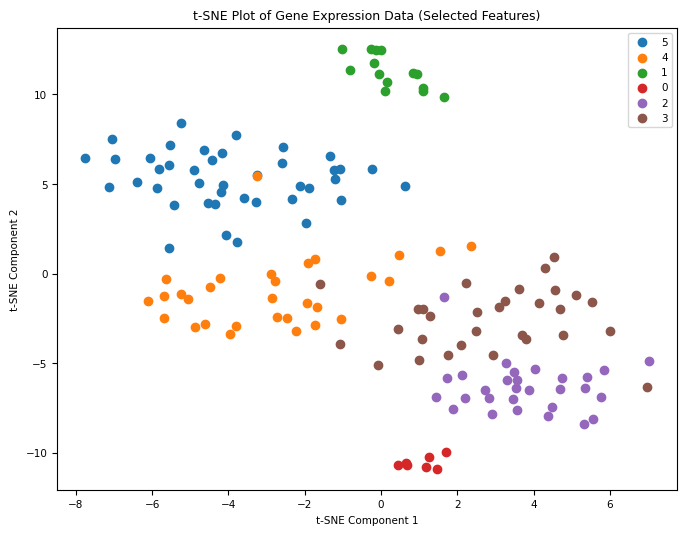

In [17]:
# T-sne plot with selected features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_selected)

plt.figure(figsize=(8, 6))
for target in data['type'].unique():
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=target)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Plot of Gene Expression Data (Selected Features)')
plt.legend()
plt.savefig("tsne_selected_afsa_breast.png")
plt.show()